# The atoms of computation

## Introduction

Programming a quantum computer is now something that anyone can do in the comfort of their own home. But what to create? What is a quantum program anyway? In fact, what is a quantum computer?

These questions can be answered by making comparisons to traditional digital computers. Unfortunately, most people don’t actually understand how traditional digital computers work either. On this page, we’ll look at the basic principles behind these traditional devices, and to help us transition over to quantum computing later on, we’ll do it using the same tools we'll use with quantum computers.


## Splitting information into bits 

The first thing we need to know about is the idea of _bits_. These are designed to be the world’s simplest alphabet. With only two symbols, 0 and 1, we can represent any piece of information.

One example is numbers. You are probably used to representing a number through a [string](gloss:string) of the ten digits 0, 1, 2, 3, 4, 5, 6, 7, 8, and 9. In this string of digits, each digit represents how many times the number contains a certain [power](gloss:power) of ten. For example, when we write 213, we mean:

$$ 200+10+3 $$

or, expressed in a way that emphasizes the powers of ten

$$ (2×10^2)+(1×10^1)+(3×10^0) $$

Though we usually use this system based on the number 10, we can just as easily use one based on any other number. The binary number system, for example, is based on the number two. This means using the two characters 0 and 1 to express numbers as multiples of powers of two. For example, 213 becomes 11010101, since:

$$ 
\begin{aligned}
213 = & \phantom{+}(1×2^7)+(1×2^6)+(0×2^5)\\
       & +(1×2^4)+(0×2^3)+(1×2^2)\\
       & +(0×2^1)+(1×2^0) \\
\end{aligned}
$$

In this we are expressing numbers as multiples of 2, 4, 8, 16, 32, etc. instead of 10, 100, 1000, etc.


<!-- ::: q-block.binary -->

### Try it

    q-binary

<!-- ::: -->

&nbsp;


These strings of bits, known as binary strings, can be used to represent more than just numbers. For example, there is a way to represent any text using bits. For any letter, number, or punctuation mark you want to use, you can find a corresponding string of at most eight bits using [this table](https://www.ibm.com/docs/en/aix/7.2?topic=adapters-ascii-decimal-hexadecimal-octal-binary-conversion-table). Though these are quite arbitrary, this is a widely agreed-upon standard. In fact, it's what was used to transmit this article to you through the internet.

This is how all information is represented in conventional computers. Whether numbers, letters, images, or sound, it all exists in the form of binary strings.

Like our standard digital computers, quantum computers are based on this same basic idea. The main difference is that they use _qubits,_ an extension of the bit to [quantum mechanics](gloss:quantum-mechanics). In the rest of this textbook, we will explore what qubits are, what they can do, and how they do it. In this section, however, we are not talking about quantum at all. So, we just use qubits as if they were bits.

<!-- ::: q-block.exercise -->

### Quick quiz

<!-- ::: q-quiz(goal="intro-aoc-1") -->

<!-- ::: .question -->

If you have $n$ bits, how many different numbers could you write down?

<!-- ::: -->

<!-- ::: .option -->

1. $n$

<!-- ::: -->

<!-- ::: .option -->

2. $n^2$

<!-- ::: -->

<!-- ::: .option(correct) -->

3. $2^n$

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

## Circuit diagrams

We saw in the last page that a computation takes some input data and performs operations on this to produce some output data. With the quantum computers we’ll learn about in this textbook, this data will always be in the form of bits. Now we know what bits are, let’s see how we can manipulate them in order to turn the inputs we have into the outputs we need.

It’s often useful to represent this process in a diagram known as a _circuit diagram_. These diagrams have inputs on the left, outputs on the right, and operations represented by arcane symbols in between. These operations are called 'gates', mostly for historical reasons. Here's an example of what a circuit looks like for standard, bit-based computers. You aren't expected to understand what it does. It should simply give you an idea of what these circuits look like.

![example of a classical circuit diagram](images/aoc/logic_gates.png)

For quantum computers, we use the same basic idea but have different conventions for how to represent inputs, outputs, and the symbols used for operations. Here is the “quantum circuit” that represents the same process as above.

![example of a quantum circuit diagram](images/aoc/quantum_circuit.png)

In the rest of this section, we will explain how to build quantum circuits. At the end, you'll know how to create the circuit above, what it does, and why it's useful.

## Creating circuits with Qiskit

To create a quantum circuit, we will import the <code>QuantumCircuit</code> class, and create a new <code>QuantumCircuit</code> object.

<!-- ::: q-block.reminder -->

### Reminder

<details>
    <summary>Python basics (what’s all this about classes and objects?)</summary>
    
We know we can describe all information using a bunch of bits, which is how computers store and process everything, including quantum circuits! But it’s difficult for us humans to think about how we do this, and how we manipulate those bits to represent the circuits we want.

The <code>QuantumCircuit</code> class is a set of instructions for representing quantum circuits as bits.  The line <code>qc = QuantumCircuit(4, 2)</code> in the cell below is a constructor, which tells Python to set aside some bits in your computer that we’ll use to represent a quantum circuit. When we want to refer to this quantum circuit (or rather, the bits that represent this quantum circuit) we’ll use the variable ‘<code>qc</code>’. We say ‘<code>qc</code>’ refers to a "<code>QuantumCircuit</code> object".

This allows us humans to think about quantum circuits at a high, abstract level; we can say things like “add an X-gate” and Qiskit will take care of what we need to do to the bits in our computer to reflect this change.

</details>

<!-- ::: -->

On creating a quantum circuit, we need to tell [Python](gloss:python) how many qubits our circuit should have, and we can optionally also tell it how many classical bits our circuit should have. We need classical bits to store the measurements of our qubits, the reason for this will become clear later in this course.

## Your first quantum circuit

In a circuit, we typically need to do three jobs: First, encode the input, then do some actual computation, and finally extract an output. For your first quantum circuit, we'll focus on the last of these jobs. We start by creating a quantum circuit with 3 qubits and 3 outputs.

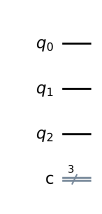

In [1]:
from qiskit import QuantumCircuit
# Create quantum circuit with 3 qubits and 3 classical bits
# (we'll explain why we need the classical bits later)
qc = QuantumCircuit(3, 3)
qc.draw()  # returns a drawing of the circuit

Finally the method <code>qc.draw()</code> creates a drawing of the circuit for us. Jupyter Notebooks evaluate the last line of a code cell and display it below the cell. Since <code>qc.draw()</code> [returns](gloss:return) a drawing, that’s what we’re seeing under the code. There are no gates in our circuit yet, so we just see some horizontal lines.

<!-- ::: q-block.reminder -->

### Reminder

<details>
    <summary>Python basics (what’s a method?)</summary>
    The <code>QuantumCircuit</code> class is a set of instructions for representing quantum circuits as bits, but when we want to change one of these circuits, we also need to know how to change the bits accordingly. In [Python](gloss:python), objects come with ‘methods’, which are sets of instructions for doing something with that object. In the cell above, the <code>.draw()</code> method looks at the circuit we’ve created and produces a human-readable drawing of that circuit.
    
</details>

<!-- ::: -->

Next, we need a way to tell our quantum computer to measure our qubits and record the results. To do this, we add a "measure" operation to our quantum circuit. We can do this with the `QuantumCircuit`'s `.measure()` method.

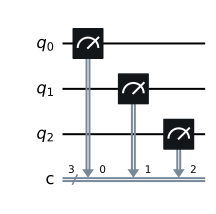

In [2]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(3, 3)
# measure qubits 0, 1 & 2 to classical bits 0, 1 & 2 respectively
qc.measure([0,1,2], [0,1,2])
qc.draw()

Next, let's see what the results of running this circuit would be. To do this, we'll use a quantum simulator, which is a standard computer calculating what an ideal quantum computer would do. Because simulating a quantum computer is believed to be difficult for classical computers (the best algorithms we have grow exponentially with the number of qubits), these simulations are only possible for circuits with small numbers of qubits (up to ~30 qubits), or certain types of circuits for which we can use some tricks to speed up the simulation. Simulators are very useful tools for designing smaller quantum circuits.

Let's import Qiskit’s simulator (called Aer), and make a new simulator object.

In [3]:
from qiskit.providers.aer import AerSimulator
sim = AerSimulator()  # make new simulator object

To do the simulation, we can use the simulators <code>.run()</code> method. This returns a "job", which contains information about the experiment, such as whether the experiment is running or completed, what backend we ran the experiment on, and importantly for us, what the results of the experiment are!

To get the results from the job, we use the results method, and the most popular way to view the results is as a dictionary of "counts".

In [4]:
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
result.get_counts()    # interpret the results as a "counts" dictionary

{'000': 1024}

The keys in counts dictionary are bit-strings, and the values are the number of times that bit-string was measured. Quantum computers can have randomness in their results, so it's common to repeat the circuit a few times. This circuit was repeated 1024 times, which is the default number of times to repeat a circuit in Qiskit. By convention, qubits always start in the state `0`, and since we are doing nothing to them before measurement, the results are always `0`.

### Encoding an input

Now let's look at how to encode a different binary string as an input. For this, we need what is known as a NOT gate. This is the most basic operation that you can do in a computer. It simply flips the bit value: 0 becomes 1 and 1 becomes 0. For qubits, we use a gate known as the _X-gate_ for this.

Below, we’ll create a new circuit dedicated to the job of encoding:

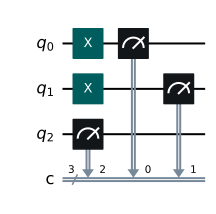

In [5]:
# Create quantum circuit with 3 qubits and 3 classical bits:
qc = QuantumCircuit(3, 3)
qc.x([0,1])  # Perform X-gates on qubits 0 & 1
qc.measure([0,1,2], [0,1,2])
qc.draw()    # returns a drawing of the circuit

And let's simulate our circuit to see the results:

In [6]:
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
result.get_counts()    # interpret the results as a "counts" dictionary

{'011': 1024}

<!-- ::: q-block.exercise -->

### Quick quiz

<!-- ::: q-quiz(goal="intro-aoc-2") -->

<!-- ::: .question -->

What is the binary number `011` in decimal?

<!-- ::: -->

<!-- ::: .option -->

1. 5

<!-- ::: -->

<!-- ::: .option -->

2. 2

<!-- ::: -->

<!-- ::: .option(correct) -->

3. 3

<!-- ::: -->

<!-- ::: -->

Modify the code above to create a quantum circuit that encodes the numbers 6 and 4. Are the results what you'd expect?

<!-- ::: -->

Now we know how to encode information in a computer. The next step is to process it: To take an input that we have encoded, and turn it into an output that tells us something new.

## Creating an adder circuit

### Remembering how to add

To look at turning inputs into outputs, we need a problem to solve. Let’s do some basic maths. In primary school, you will have learned how to take large mathematical problems and break them down into manageable pieces. For example, how would you go about solving this addition problem?

<!-- ::: q-block -->

### Remembering how to add

<!-- ::: q-carousel -->

<!-- ::: div -->

![image of addition](images/aoc/carousel/0/0.svg)

How can we solve a problem like this? Click through this carousel to find out.

<!-- ::: -->

<!-- ::: div -->

![image of addition](images/aoc/carousel/0/1.svg)

One way is to do it digit by digit, from right to left. So we start with 3+4.

<!-- ::: -->

<!-- ::: div -->

![image of addition](images/aoc/carousel/0/2.svg)

And then 1+5.

<!-- ::: -->

<!-- ::: div -->

![image of addition](images/aoc/carousel/0/3.svg)

Then 2+8.

<!-- ::: -->

<!-- ::: div -->

![image of addition](images/aoc/carousel/0/4.svg)

Finally we have 9+1+1, and get our answer.

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->



This may just be simple addition, but it demonstrates the principles behind all algorithms. Whether the algorithm is designed to solve mathematical problems or process text or images, we always break big tasks down into small and simple steps.

To run on a computer, algorithms need to be compiled down to the smallest and simplest steps possible. To see what these look like, let’s do the above addition problem again but in binary.

<!-- ::: q-block -->

### Adding binary numbers

<!-- ::: q-carousel -->

<!-- ::: div -->

![image of addition](images/aoc/carousel/1/0.svg)

Note that the second number has a bunch of extra 0s on the left. This just serves to make the two strings the same length.

<!-- ::: -->

<!-- ::: div -->

![image of addition](images/aoc/carousel/1/1.svg)

Our first task is to do the 1+0 for the column on the right. In binary, as in any number system, the answer is 1.

<!-- ::: -->

<!-- ::: div -->

![image of addition](images/aoc/carousel/1/2.svg)

We get the same result for the 0+1 of the second column.

<!-- ::: -->

<!-- ::: div -->

![image of addition](images/aoc/carousel/1/3.svg)

Next, we have 1+1. As you’ll surely be aware, 1+1=2. In binary, the number 2 is written 10, and so requires two bits. This means that we need to carry the 1, just as we would for the number 10 in decimal. The next column now requires us to calculate 1+1+1. This means adding three numbers together, so things are getting complicated for our computer.

<!-- ::: -->

<!-- ::: div -->

![image of addition](images/aoc/carousel/1/4.svg)

But we can still compile it down to simpler operations, and do it in a way that only ever requires us to add two bits together. For this, we can start with just the first two 1s.

<!-- ::: -->

<!-- ::: div -->

![image of addition](images/aoc/carousel/1/5.svg)

Now we need to add this 10 to the final 1 , which can be done using our usual method of going through the columns. The final answer is 11 (also known as 3).

<!-- ::: -->

<!-- ::: div -->

![image of addition](images/aoc/carousel/1/6.svg)

Now we can get back to the rest of the problem. With the answer of 11, we have another carry bit. So now we have another 1+1+1 to do. But we already know how to do that, so it’s not a big deal.

<!-- ::: -->

<!-- ::: div -->

In fact, everything left so far is something we already know how to do. This is because, if you break everything down into adding just two bits, there are only four possible things you’ll ever need to calculate. Here are the four basic sums (we’ll write all the answers with two bits to be consistent):

![image of addition](images/aoc/carousel/1/7.svg)

This is called a half adder. If our computer can implement this, and if it can chain many of them together, it can add anything.

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

### Adding with quantum circuits

Let's make our own half adder from a quantum circuit. This will include a part of the circuit that encodes the input, a part that executes the algorithm, and a part that extracts the result. The first part will need to be changed whenever we want to use a new input, but the rest will always remain the same.

![outline of our adder circuit](images/aoc/half-adder.svg)

The two bits we want to add are encoded in the qubits 0 and 1. The above example encodes a 1 in both these qubits, and so it seeks to find the solution of 1+1. The result will be a string of two bits, which we will read out from the qubits 2 and 3. All that remains is to fill in the actual program, which lives in the blank space in the middle.

The dashed lines in the image are just to distinguish the different parts of the circuit (although they can have more interesting uses too)

The basic operations of computing are known as logic gates. We’ve already used the NOT gate, but this is not enough to make our half adder. We could only use it to manually write out the answers. Since we want the computer to do the actual computing for us, we’ll need some more powerful gates.

To see what we need, let’s take another look at what our half adder needs to do.

![required operations of a half adder](images/aoc/half_adder_reqs.svg)

The rightmost bit in all four of these answers is completely determined by whether the two bits we are adding are the same or different. So for 0+0 and 1+1, where the two bits are equal, the rightmost bit of the answer comes out 0. For 0+1 and 1+0, where we are adding different bit values, the rightmost bit is 1.

To get this part of our solution correct, we need something that can figure out whether two bits are different or not. Traditionally, in the study of digital computation, this is called an XOR gate.

<table>
<thead>
  <tr>
    <th>Input 1</th>
    <th>Input 2</th>
    <th>XOR Output</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>0</td>
    <td>0</td>
    <td>0</td>
  </tr>
  <tr>
    <td>0</td>
    <td>1</td>
    <td>1</td>
  </tr>
  <tr>
    <td>1</td>
    <td>0</td>
    <td>1</td>
  </tr>
  <tr>
    <td>1</td>
    <td>1</td>
    <td>0</td>
  </tr>
</tbody>
</table>

In quantum computers, the job of the XOR gate is done by the ‘controlled-NOT gate’. Since that's quite a long name, we usually just call it the ‘CNOT’. In circuit diagrams, it is drawn as in the image below. This is applied to a pair of qubits. One acts as the control qubit (this is the one with the little dot). The other acts as the target qubit (with the big circle and cross - kind of like a target mark).

![image of CNOT gate](images/aoc/cnot_xor.svg)

In Qiskit, we can use the `.cx()` method to add a CNOT to our circuit. We need to give the indices of the two qubits it acts on as arguments. Here's an example:

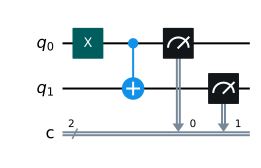

Result:  {'11': 1024}


In [7]:
# Create quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.cx(0,1)  # CNOT controlled by qubit 0 and targeting qubit 1
qc.measure([0,1], [0,1])
display(qc.draw())     # display a drawing of the circuit

job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
# interpret the results as a "counts" dictionary
print("Result: ", result.get_counts())

For our half adder, we don’t want to overwrite one of our inputs. Instead, we want to write the result on a different pair of qubits. For this, we can use two CNOTs and write the output to a new qubit which we know will be in the state 0:

![circuit diagram of using two CNOTs to create an XOR gate](images/aoc/xor.svg)

We are now halfway to a fully working half adder. We know how to calculate the rightmost output bit, so we just need to work out how to calculate the left output bit. If you look again at the four possible sums, you’ll notice that there is only one case for which this is 1 instead of 0: 1+1=10. It happens only when both the bits we are adding are 1.

![required operations of a half adder](images/aoc/half_adder_reqs.svg)

To calculate this part of the output, we could just get our computer to look at whether both of the inputs are 1. If they are — and only if they are — we need to do a NOT gate on qubit 3. That will flip it to the required value of 1 for this case only, giving us the output we need.

For this, we need a new gate: like a CNOT but controlled on two qubits instead of just one. This will perform a NOT on the target qubit only when both controls are in state 1. This new gate is called the [Toffoli](gloss:toffoli) gate. For those of you who are familiar with Boolean logic gates, it is basically an AND gate.

![half adder quantum circuit](images/aoc/ha_circuit.svg)

In Qiskit, we can add this to a circuit using the `.ccx()` method. And there we have it! A circuit that can compute the famous mathematical problem of 1+1.

<!-- ::: q-block.exercise -->

### Try it

Arrange the blocks to create the code block that would produce the half-adder circuit above.

    q-drag-and-drop-code(goal="intro-aoc-3")
        .line from qiskit import QuantumCircuit
        .line qc = QuantumCircuit(4, 2)
        .line(group=0) qc.cx(0, 2)
        .line(group=0) qc.cx(1, 2)
        .line(group=0) qc.ccx(0, 1, 3) 
        .result-info

<!-- ::: -->

Great! Now we have our half adder, the next thing to do it to check that it works. To do this, we’ll create another circuit that encodes some input, applies the half adder, and extracts the output. 

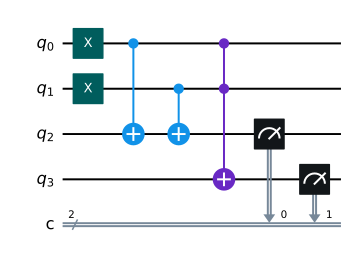

In [8]:
test_qc = QuantumCircuit(4, 2)

# First, our circuit should encode an input (here '11')
test_qc.x(0)
test_qc.x(1)

# Next, it should carry out the adder circuit we created
test_qc.cx(0,2)
test_qc.cx(1,2)
test_qc.ccx(0,1,3)

# Finally, we will measure the bottom two qubits to extract the output
test_qc.measure(2,0)
test_qc.measure(3,1)
test_qc.draw()

In [9]:
job = sim.run(test_qc)  # run the experiment
result = job.result()   # get the results
result.get_counts()     # interpret the results as a “counts” dictionary

{'10': 1024}

Here we can see that the result ‘10’ was measured 1024 times, and we didn’t measure any other result.

<!-- ::: q-block.exercise -->

### Exercise

Verify the half adder circuit works for all four possible inputs.

[Try in IBM Quantum Lab](https://quantum-computing.ibm.com/lab)

<!-- ::: -->

The half adder contains everything you need for addition. With the NOT, CNOT, and Toffoli gates, we can create programs that add any set of numbers of any size.

These three gates are enough to do everything else in computing too. In fact, we can even do without the CNOT. Additionally, the NOT gate is only really needed to create bits with value 1. The Toffoli gate is essentially the atom of mathematics. It is the simplest element, from which every other problem-solving technique can be compiled.